In [ ]:
import math

h = 50
k_b = 25
W_b = 0.03
Rc_ = 1e-4
T_h = 303
th = 0.002
k_a = 70
T_inf = 293
N = 10 * 10
D = 0.0015
L = 0.015

Rb = th / (k_b * W_b**2)

m = (4 * h / (k_a * D)) ** 0.5
neta = math.tanh(m * L) / (m * L)
Ra = 1 / (neta * h * math.pi * D * L)
Rc = 4 * Rc_ / (math.pi * D**2)
Rsa = 1 / (h * (W_b**2 - N * math.pi * D**2 / 4))
Rcc = Rc / N
Raa = Ra / N
Ra_comb = (1 / Rsa + 1 / (Raa + Rcc)) ** (-1)
Rt = Rb + Ra_comb

q_dot = (T_h - T_inf) / Rt

print("m", m)
print("neta", neta)
print("Ra", Ra)
print("Rcc", Rcc)
print("Raa", Raa)
print("Rb", Rb)
print("Rc", Rc)
print("Rsa", Rsa)
print("Ra_comb", Ra_comb)
print("Rt", Rt)
print("q_dot", q_dot)

m 43.643578047198474
neta 0.8780130282899806
Ra 322.2527592823045
Rcc 0.5658842421045168
Raa 3.2225275928230452
Rb 0.08888888888888889
Rc 56.588424210451684
Rsa 27.65160147573168
Ra_comb 3.331921435600875
Rt 3.420810324489764
q_dot 2.923283974095104


m 51.6397779494322*(h/k_a)**0.5
neta 1.29099444873581*tanh(0.774596669241483*(h/k_a)**0.5)/(h/k_a)**0.5
Ra 10958.30122776*(h/k_a)**0.5/(h*tanh(0.774596669241483*(h/k_a)**0.5))
Rcc 0.5658842421045168
Raa 109.5830122776*(h/k_a)**0.5/(h*tanh(0.774596669241483*(h/k_a)**0.5))
Rb 0.08888888888888889
Rc 56.588424210451684
Rsa 1382.58007378658/h
Ra_comb 1/(0.000723285413235574*h + 1/(0.565884242104517 + 109.5830122776*(h/k_a)**0.5/(h*tanh(0.774596669241483*(h/k_a)**0.5))))
Rt 0.0888888888888889 + 1/(0.000723285413235574*h + 1/(0.565884242104517 + 109.5830122776*(h/k_a)**0.5/(h*tanh(0.774596669241483*(h/k_a)**0.5))))
q_dot 10/(0.0888888888888889 + 1/(0.000723285413235574*h + 1/(0.565884242104517 + 109.5830122776*(h/k_a)**0.5/(h*tanh(0.774596669241483*(h/k_a)**0.5)))))


<lambdifygenerated-35>:2: RuntimeWarning: divide by zero encountered in divide
  return 10/(0.0888888888888889 + (0.000723285413235574*h + (0.565884242104517 + 109.5830122776*(h/k_a)**0.5/(h*tanh(0.774596669241483*(h/k_a)**0.5)))**(-1.0))**(-1.0))
<lambdifygenerated-35>:2: RuntimeWarning: invalid value encountered in divide
  return 10/(0.0888888888888889 + (0.000723285413235574*h + (0.565884242104517 + 109.5830122776*(h/k_a)**0.5/(h*tanh(0.774596669241483*(h/k_a)**0.5)))**(-1.0))**(-1.0))
<lambdifygenerated-36>:2: RuntimeWarning: divide by zero encountered in divide
  return 10/(0.0888888888888889 + (0.000723285413235574*h + (0.565884242104517 + 109.5830122776*(h/k_a)**0.5/(h*tanh(0.774596669241483*(h/k_a)**0.5)))**(-1.0))**(-1.0))
<lambdifygenerated-36>:2: RuntimeWarning: invalid value encountered in divide
  return 10/(0.0888888888888889 + (0.000723285413235574*h + (0.565884242104517 + 109.5830122776*(h/k_a)**0.5/(h*tanh(0.774596669241483*(h/k_a)**0.5)))**(-1.0))**(-1.0))


Text(0, 0.5, 'k')

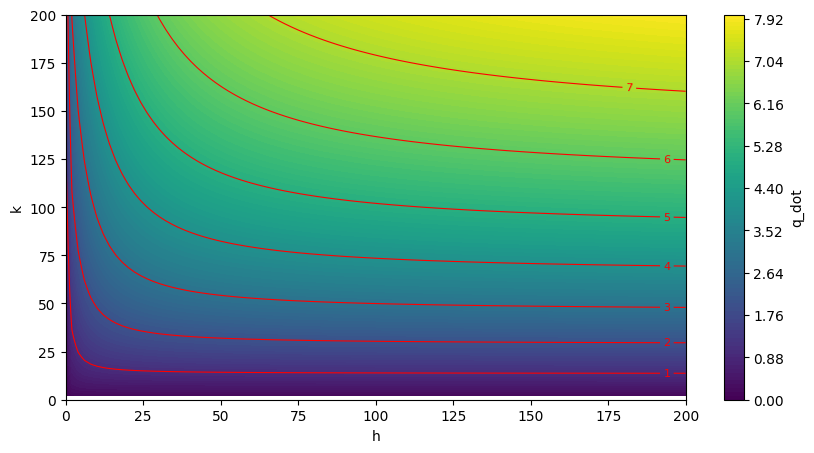

In [37]:
import matplotlib.pyplot as plt
from sympy import lambdify
import numpy as np
from sympy import Function, dsolve, Derivative, solve
from sympy.abc import x
from sympy import Eq, Derivative, Function, exp, Symbol, pi, tanh
import math

h = Symbol("h")
k_b = 25
W_b = 0.03
Rc_ = 1e-4
T_h = 303
th = 0.002
k_a = Symbol("k_a")
T_inf = 293
N = 10 * 10
D = 0.0015
L = 0.015

Rb = th / (k_b * W_b**2)

m = (4 * h / (k_a * D)) ** 0.5
neta = tanh(m * L) / (m * L)
Ra = 1 / (neta * h * math.pi * D * L)
Rc = 4 * Rc_ / (math.pi * D**2)
Rsa = 1 / (h * (W_b**2 - N * math.pi * D**2 / 4))
Rcc = Rc / N
Raa = Ra / N
Ra_comb = (1 / Rsa + 1 / (Raa + Rcc)) ** (-1)
Rt = Rb + Ra_comb

q_dot = (T_h - T_inf) / Rt

print("m", m)
print("neta", neta)
print("Ra", Ra)
print("Rcc", Rcc)
print("Raa", Raa)
print("Rb", Rb)
print("Rc", Rc)
print("Rsa", Rsa)
print("Ra_comb", Ra_comb)
print("Rt", Rt)
print("q_dot", q_dot)

k_arr, h_arr = np.meshgrid(np.linspace(0, 200, 100), np.linspace(0, 200, 100))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

cf = ax.contourf(
    h_arr,
    k_arr,
    lambdify((h, k_a), q_dot, modules="numpy")(k_arr, h_arr),
    levels=100,
    cmap="viridis",
)
cs = ax.contour(
    h_arr,
    k_arr,
    lambdify((h, k_a), q_dot, modules="numpy")(k_arr, h_arr),
    levels=np.linspace(1, 8, 8),
    colors="red",
    linewidths=0.8,
)
ax.clabel(cs, inline=True, fontsize=8)
fig.colorbar(cf, ax=ax, label="q_dot")
ax.set_xlabel("h")
ax.set_ylabel("k")